In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [16]:
test.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,0.0,0.0,96.1,333.6,0.0,199.6,0.0,36.0,1.1,0.0,94.7,0.0,1000.3,1007.6,0.0,0.0,0.1,1006.0,23.2,999.5,91.4,17.5,19.2,1007.6,0.0,194.7,0.0,84.0,59.9,0.0
1,4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,0.0,0.0,96.2,335.5,0.0,194.0,0.0,127.7,0.6,0.0,95.3,0.0,1000.2,1007.5,0.0,0.0,0.3,1005.9,23.1,999.4,91.6,17.4,19.1,1007.5,0.0,173.1,0.0,84.0,60.5,0.0
2,4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,0.0,0.0,96.4,0.0,0.0,172.9,0.0,59.0,0.0,0.0,93.9,0.0,1000.1,1007.4,0.0,0.0,0.7,1005.9,23.1,999.3,92.0,17.2,19.0,1007.5,0.0,208.6,0.0,85.0,60.8,0.0
3,4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,1007.2,0.0,0.0,96.5,252.9,0.0,153.5,0.0,54.9,0.4,0.0,94.4,0.0,1000.1,1007.4,0.0,0.0,0.6,1005.8,22.8,999.3,93.0,17.2,18.8,1007.4,0.0,185.0,0.0,85.8,61.2,0.0
4,4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,1007.2,0.0,0.0,96.6,238.2,0.0,173.8,0.0,48.8,0.8,0.0,95.7,0.0,1000.2,1007.3,0.0,0.0,0.7,1005.9,22.8,999.2,92.3,17.4,18.9,1007.5,0.0,162.8,0.0,87.3,61.7,0.0


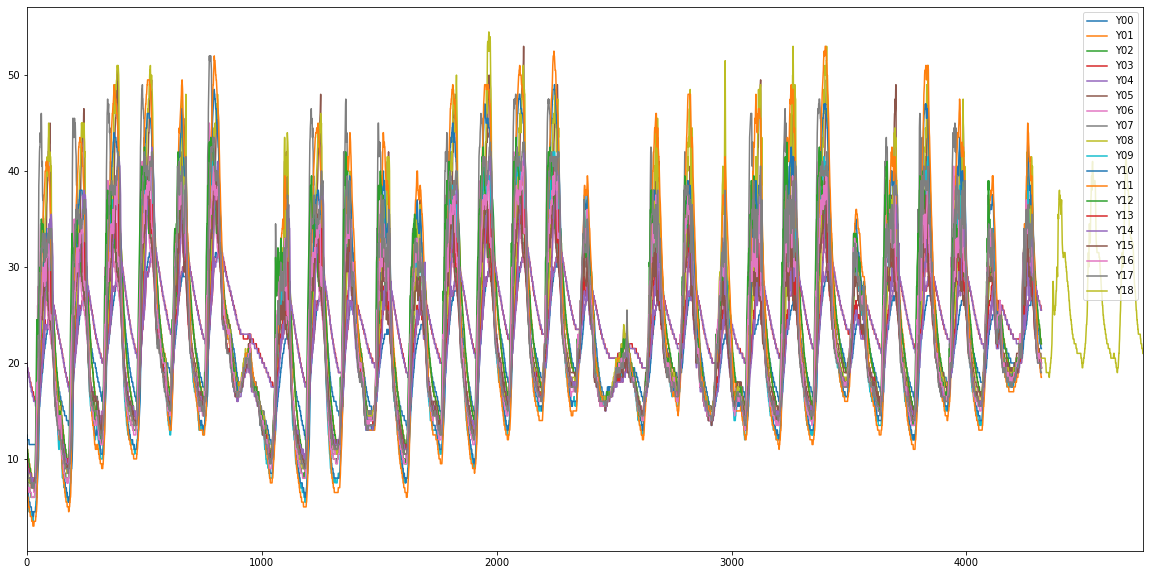

In [17]:
train.loc[:,"Y00":"Y18"].plot(figsize=(20,10))

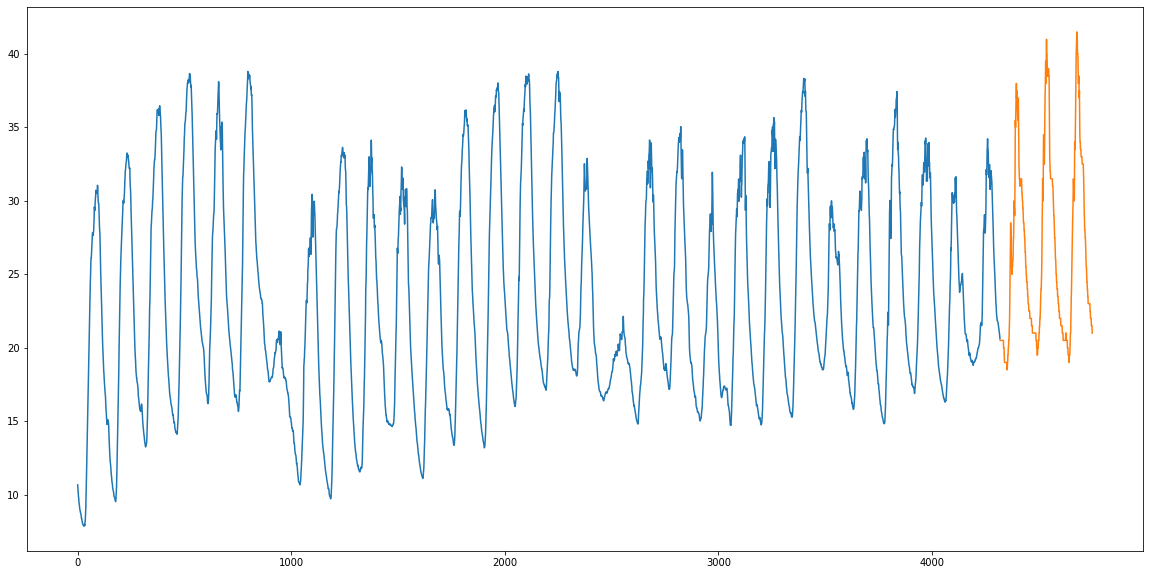

In [18]:
plt.figure(figsize=(20,10))
mean_temp = train.loc[:, "Y00":"Y17"].mean(axis=1)
plt.plot(mean_temp)
plt.plot(train["Y18"])

In [0]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [0]:
t = train["Y18"].isna()
null_index = t[t==True].index
train.loc[null_index, "Y18"] = train.loc[null_index, "Y00":"Y17"].mean(axis=1)

In [0]:
X_train = train.loc[:, "X00":"X39"]
y_train = train["Y18"]

In [24]:
lgb_train = lgb.Dataset(X_train, label=y_train)

lgb_param = {
    "objective":"regression",
    "metrics":"mae",
    "learning_rate":0.01,
}

print("cv start")
cv_result = lgb.cv(
    lgb_param,
    lgb_train,
    num_boost_round=99999,
    nfold=5,
    early_stopping_rounds=10,
    stratified=False,
    verbose_eval=10 
)

print("train start")
lgb_model = lgb.train(
    lgb_param,
    lgb_train,
    num_boost_round=len(cv_result["l1-mean"])
)

cv start
[20]	cv_agg's l2: 35.834 + 0.955943
[40]	cv_agg's l2: 25.0552 + 0.670085
[60]	cv_agg's l2: 17.7421 + 0.498222
[80]	cv_agg's l2: 12.6698 + 0.35378
[100]	cv_agg's l2: 9.22843 + 0.286005
[120]	cv_agg's l2: 6.88372 + 0.236746
[140]	cv_agg's l2: 5.29744 + 0.202627
[160]	cv_agg's l2: 4.19159 + 0.142536
[180]	cv_agg's l2: 3.42222 + 0.12149
[200]	cv_agg's l2: 2.88703 + 0.120239
[220]	cv_agg's l2: 2.48468 + 0.116664
[240]	cv_agg's l2: 2.2023 + 0.111857
[260]	cv_agg's l2: 2.00096 + 0.104639
[280]	cv_agg's l2: 1.85853 + 0.0971799
[300]	cv_agg's l2: 1.754 + 0.10393
[320]	cv_agg's l2: 1.67349 + 0.10293
[340]	cv_agg's l2: 1.60023 + 0.0975079
[360]	cv_agg's l2: 1.54949 + 0.0940732
[380]	cv_agg's l2: 1.50438 + 0.0892975
[400]	cv_agg's l2: 1.46864 + 0.0913191
[420]	cv_agg's l2: 1.44421 + 0.0934431
[440]	cv_agg's l2: 1.41455 + 0.0951818
[460]	cv_agg's l2: 1.39263 + 0.0898598
[480]	cv_agg's l2: 1.36488 + 0.088979
[500]	cv_agg's l2: 1.34589 + 0.086287
[520]	cv_agg's l2: 1.32834 + 0.0853428
[540]	

TypeError: ignored

In [0]:
sub["Y18"] = lgb_model.predict(test.loc[:, "X00":"X39"])


In [0]:
sub.to_csv("/content/sample_data/answer.csv",index=False)